In [1]:
#Question 6 using data from clust.data.csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

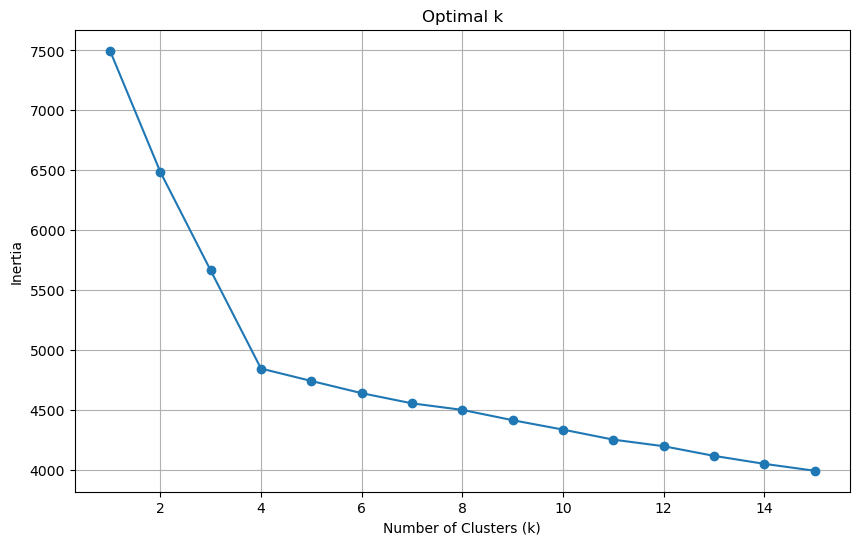

In [4]:
data = pd.read_csv('clust_data.csv')
inertia_value = []

#apply 15 times and nstart=10
#inertia measures how variable observations are within cluster
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)
    inertia_value.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), inertia_value, marker='o', linestyle='-')
plt.title('Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#a clear elbow is seen at approx cluster 4
#based on the plot, 4 clusters should be used


In [34]:
#kmeans with 4 centers
best_k = 4

kmeans = KMeans(n_clusters=best_k, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_

# observations in each cluster
count = pd.Series(labels).value_counts().sort_index()
inertia = kmeans.inertia_

print("Number of observations in each cluster:")
print(count)
print("\nValue of inertia:", inertia)

#im getting an extra line of code hope it's okay

Number of observations in each cluster:
0    25
1    25
2    25
3    25
Name: count, dtype: int64

Value of inertia: 4844.925817623822


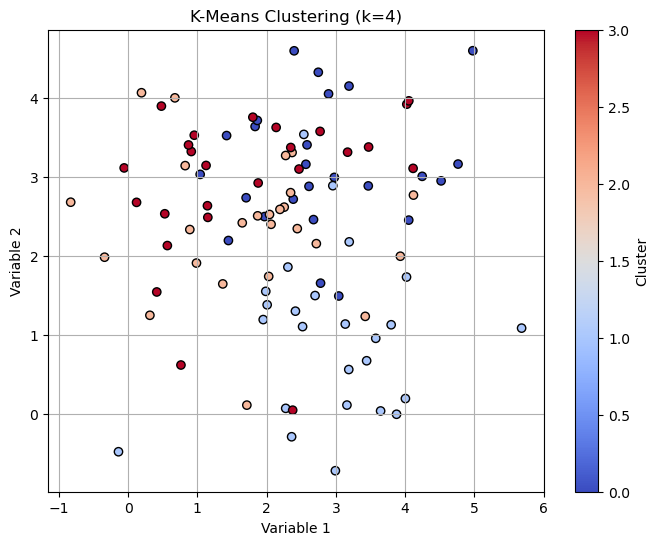

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='coolwarm', edgecolor='k')
plt.title('K-Means Clustering (k=4)')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [36]:
#from the graph, we can see that there is quite some overlap near (2, 3)
#ive analysed different centers, higher or lower than k=4
#4 was a good choice of value as the clusters are more compact 
#there is slight overlap as mentioned although those are mainly with the ones with little concentration
# a lower value shows more spread data with more outliers showing that the value does not encapsulate all the data
#A higher value shows similar results although the clsuters seen are less highlighted (more blue)
#this would mean that the clusters don't seem to be too related to each other